## MSDS 565 Predictive Modeling & Analytics 
## Final Project: Fetal Health

# Import Libraries

In [1]:
import numpy 
numpy.__version__ 
'1.21.4' 

'1.21.4'

In [2]:
#import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Read Data

In [3]:
#Reading the dataset
fhealth = pd.read_csv('fetal_health.csv')
fhealth 

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
print(fhealth.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

# Exploratory Data Analysis

In [5]:
fhealth.info() # There are 2126 data points 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
fhealth = fhealth.rename(columns = {'baseline value':'baseline_value'})
fhealth.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
fhealth = fhealth.rename(columns = {'prolongued_decelerations':'prolonged_decelerations'})
fhealth.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
fhealth['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [9]:
fhealth.baseline_value.value_counts()

133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
131.0     56
143.0     56
123.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: baseline_value, dtype: int64

# Univariate EDA

In [10]:
fhealth.loc[fhealth['fetal_health']==1.000, 'fhealth_outcome'] = 'Normal'
fhealth.loc[fhealth['fetal_health']==2.000, 'fhealth_outcome'] = 'At Risk'
fhealth.loc[fhealth['fetal_health']==3.000, 'fhealth_outcome'] = 'At Risk'

Text(0.5, 1.0, 'Fetal Health')

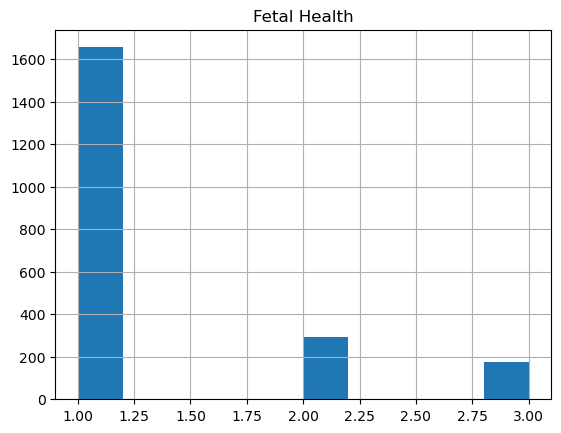

In [11]:
#Plot the Fetal Health
fhealth.fetal_health.hist()
plt.title('Fetal Health')

Text(0.5, 1.0, 'Fetal Health Outcomes')

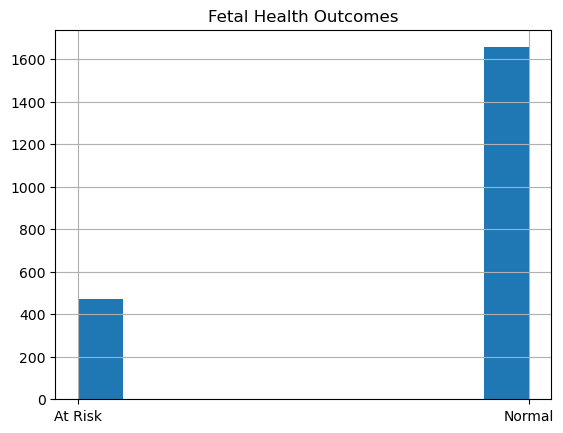

In [12]:
#Plot the Fetal Health Outcomes
fhealth.fhealth_outcome.hist()
plt.title('Fetal Health Outcomes')

Text(0.5, 1.0, 'Baseline Fetal Heartrate')

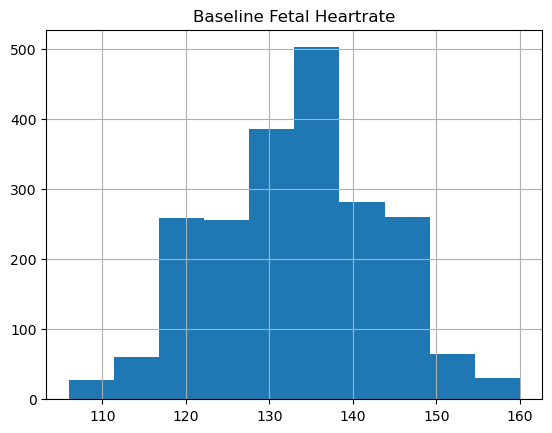

In [13]:
#Plot the Baseline Fetal Heartrate
fhealth.baseline_value.hist()
plt.title('Baseline Fetal Heartrate')

Text(0.5, 1.0, 'Severe Decelerations')

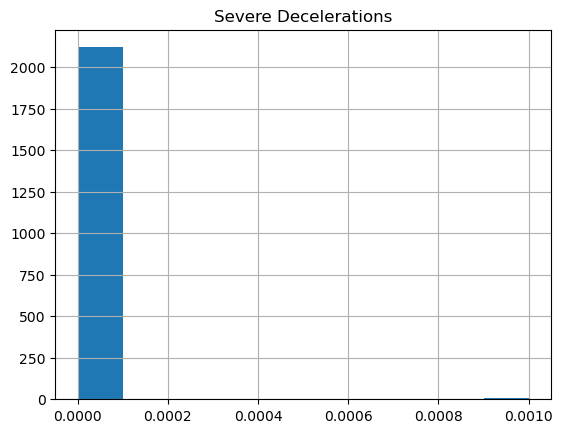

In [14]:
#Plot the Severe Decelerations
fhealth.severe_decelerations.hist()
plt.title('Severe Decelerations')

Text(0.5, 1.0, 'Prolonged Decelerations')

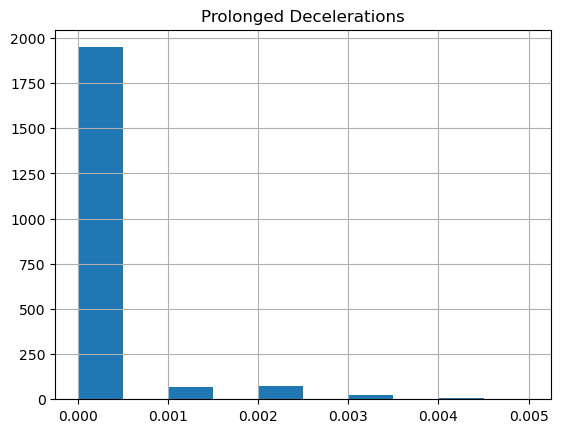

In [15]:
#Plot the Prolonged Decelerations
fhealth.prolonged_decelerations.hist()
plt.title('Prolonged Decelerations')

Text(0.5, 1.0, 'Abnormal Short Term Variability')

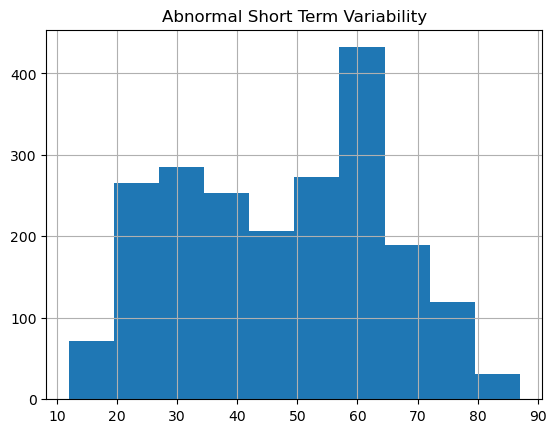

In [16]:
#Plot the Abnormal Short Term Variability
fhealth.abnormal_short_term_variability.hist()
plt.title('Abnormal Short Term Variability')

Text(0.5, 1.0, '% of Time with Abnormal Long Term Variability')

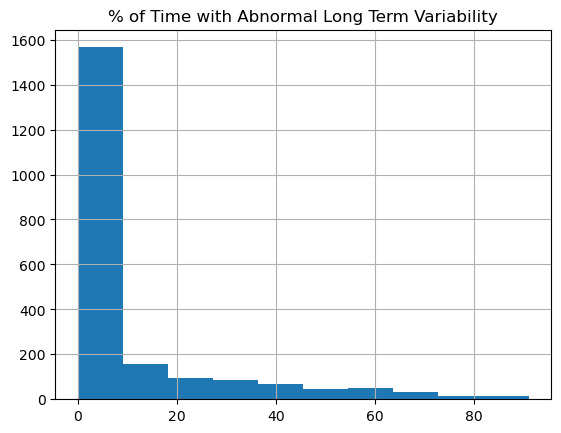

In [17]:
#Plot the % of Time with Abnormal Long Term Variability
fhealth.percentage_of_time_with_abnormal_long_term_variability.hist()
plt.title('% of Time with Abnormal Long Term Variability')

Text(0.5, 1.0, 'Histogram Min')

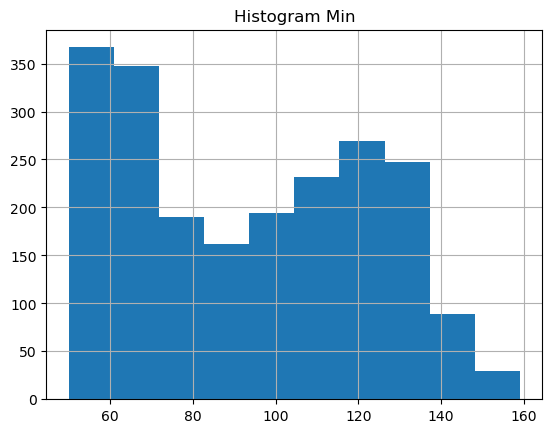

In [18]:
#Plot the Histogram Min
fhealth.histogram_min.hist()
plt.title('Histogram Min')

Text(0.5, 1.0, 'Histogram Variance')

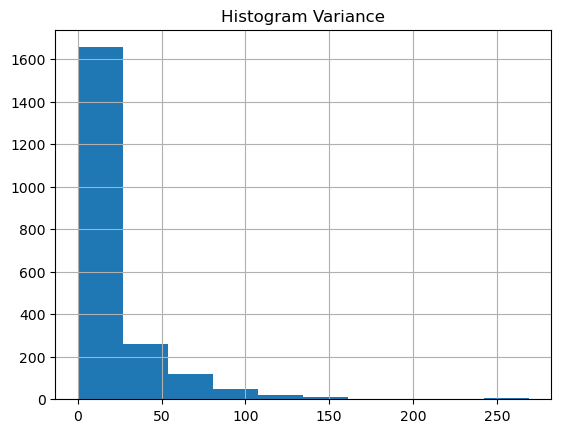

In [19]:
#Plot the Histogram Variance
fhealth.histogram_variance.hist()
plt.title('Histogram Variance')

Text(0.5, 1.0, 'Fetal Movement')

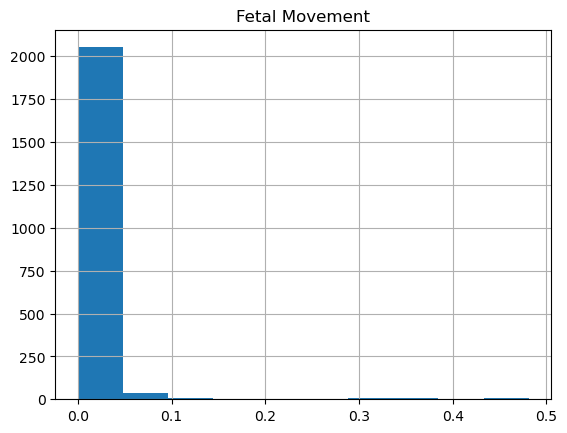

In [20]:
#Plot the Fetal Movement
fhealth.fetal_movement.hist()
plt.title('Fetal Movement')

Text(0.5, 1.0, 'Light Decelerations')

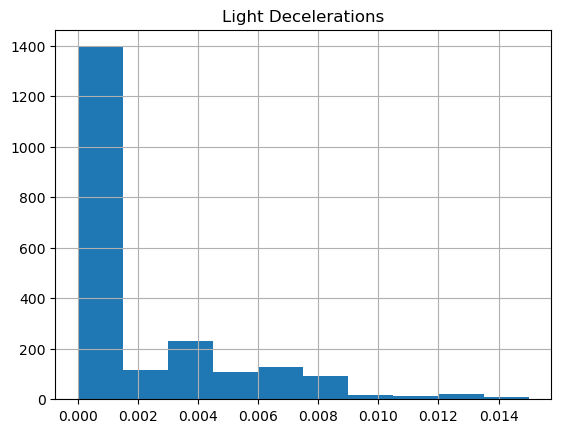

In [21]:
#Plot the Light Decelerations
fhealth.light_decelerations.hist()
plt.title('Light Decelerations')

In [22]:
# Bivariate EDA

# Fetal Health based on Histogram Min

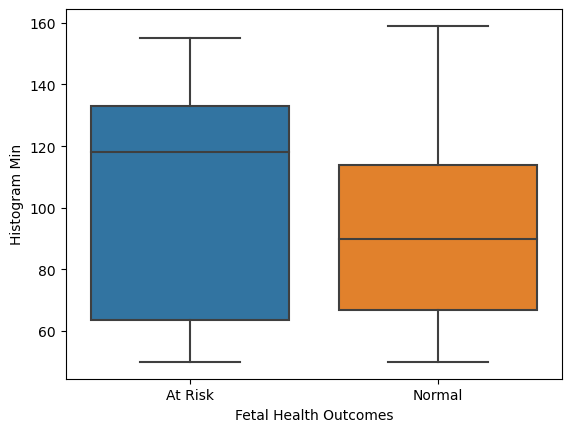

In [23]:
g = sns.boxplot(x='fhealth_outcome', y='histogram_min', data=fhealth)
g.set_xlabel('Fetal Health Outcomes')
g.set_ylabel('Histogram Min')
plt.show()

# Fetal Health based on Histogram Variance

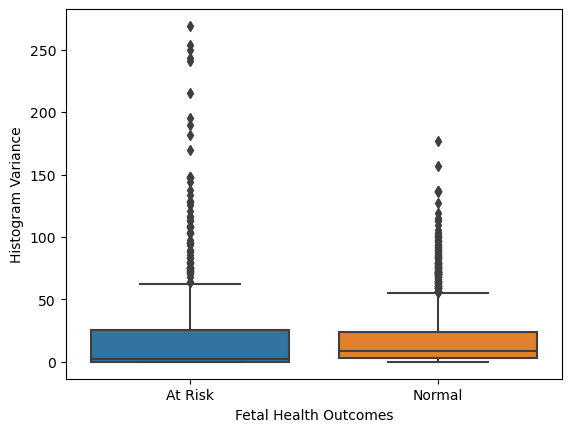

In [24]:
g = sns.boxplot(x='fhealth_outcome', y='histogram_variance', data=fhealth)
g.set_xlabel('Fetal Health Outcomes')
g.set_ylabel('Histogram Variance')
plt.show()

# Fetal Health based onAbnormal Short-Term Variability

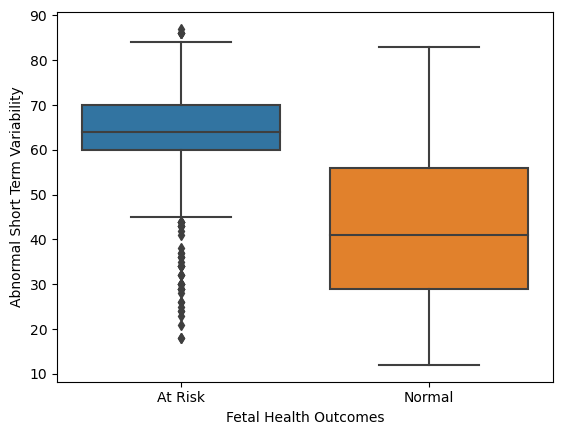

In [25]:
g = sns.boxplot(x='fhealth_outcome', y='abnormal_short_term_variability', data=fhealth)
g.set_xlabel('Fetal Health Outcomes')
g.set_ylabel('Abnormal Short Term Variability')
plt.show()

# Fetal Health based on % of Time with Abnormal Long Term Variability

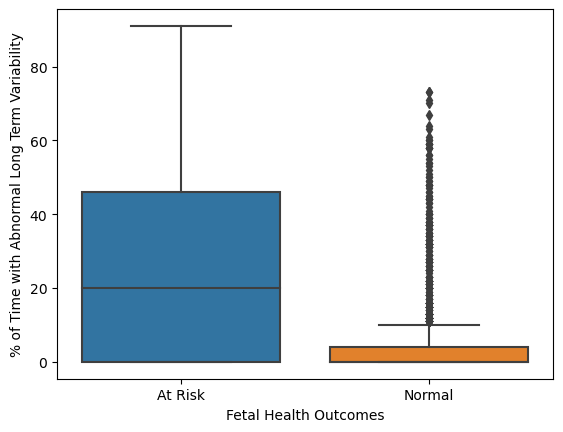

In [26]:
g = sns.boxplot(x='fhealth_outcome', y='percentage_of_time_with_abnormal_long_term_variability', data=fhealth)
g.set_xlabel('Fetal Health Outcomes')
g.set_ylabel('% of Time with Abnormal Long Term Variability')
plt.show()

# Fetal Health based on Baseline Fetal Heartrate

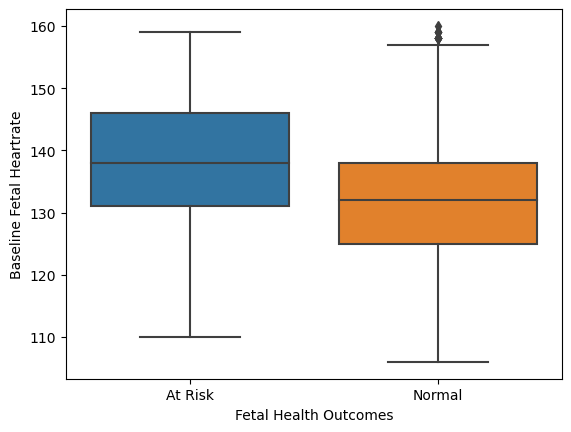

In [27]:
g = sns.boxplot(x='fhealth_outcome', y='baseline_value', data=fhealth)
g.set_xlabel('Fetal Health Outcomes')
g.set_ylabel('Baseline Fetal Heartrate')
plt.show()

## Fetal Health based on Fetal Movement/second

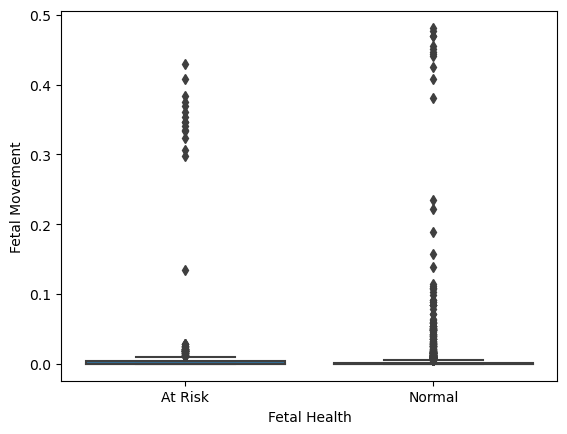

In [28]:
g = sns.boxplot(x='fhealth_outcome', y='fetal_movement', data=fhealth)
g.set_xlabel('Fetal Health')
g.set_ylabel('Fetal Movement')
plt.show()

## Fetal Health based on Uterine Contractions

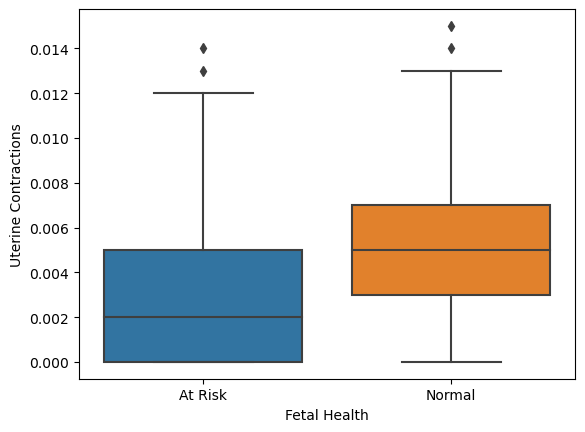

In [29]:
g = sns.boxplot(x='fhealth_outcome', y='uterine_contractions', data=fhealth)
g.set_xlabel('Fetal Health')
g.set_ylabel('Uterine Contractions')
plt.show()

## Fetal Health based on Light Decelerations

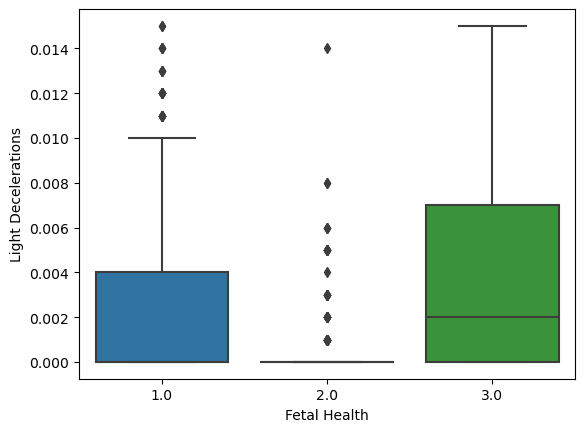

In [30]:
g = sns.boxplot(x='fetal_health', y='light_decelerations', data=fhealth)
g.set_xlabel('Fetal Health')
g.set_ylabel('Light Decelerations')
plt.show()

## Fetal Health based on Severe Decelerations

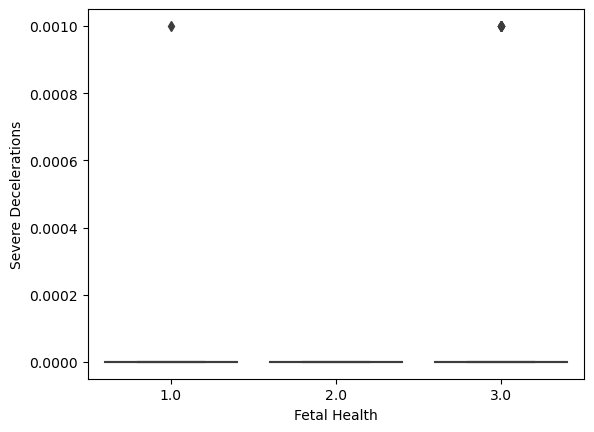

In [31]:
g = sns.boxplot(x='fetal_health', y='severe_decelerations', data=fhealth)
g.set_xlabel('Fetal Health')
g.set_ylabel('Severe Decelerations')
plt.show()

## Fetal Health based on Prolonged Decelerations

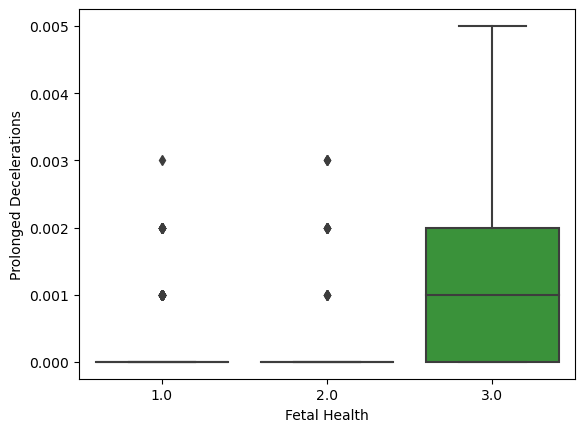

In [32]:
g = sns.boxplot(x='fetal_health', y='prolonged_decelerations', data=fhealth)
g.set_xlabel('Fetal Health')
g.set_ylabel('Prolonged Decelerations')
plt.show()

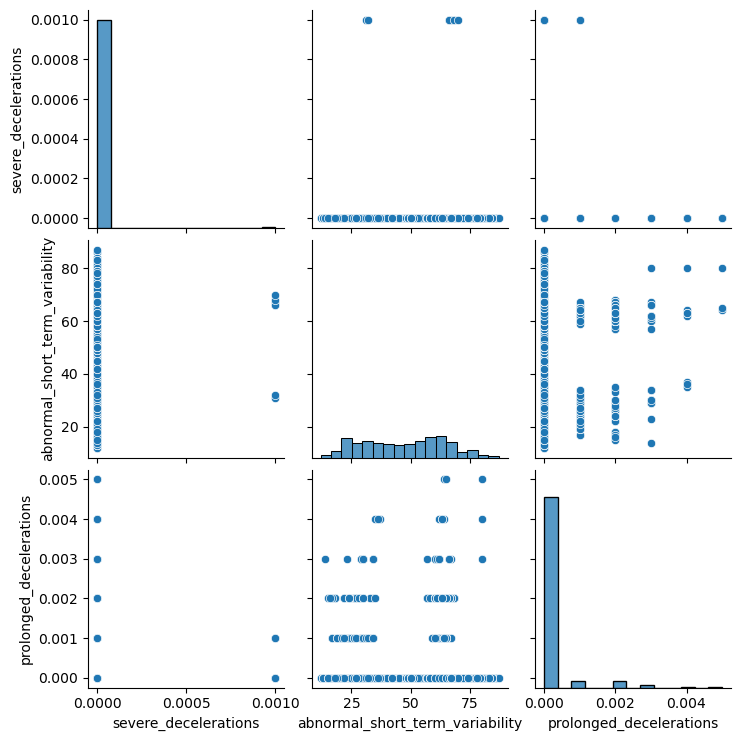

In [33]:
pair_cols = ['severe_decelerations', 'abnormal_short_term_variability', 'prolonged_decelerations']

sns.pairplot(fhealth[pair_cols])
plt.show()

In [34]:
fhealth.corr()

C:\Users\south\AppData\Local\Temp\ipykernel_9632\2503787982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fhealth.corr()


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolonged_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


C:\Users\south\AppData\Local\Temp\ipykernel_9632\277130126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = fhealth.corr()


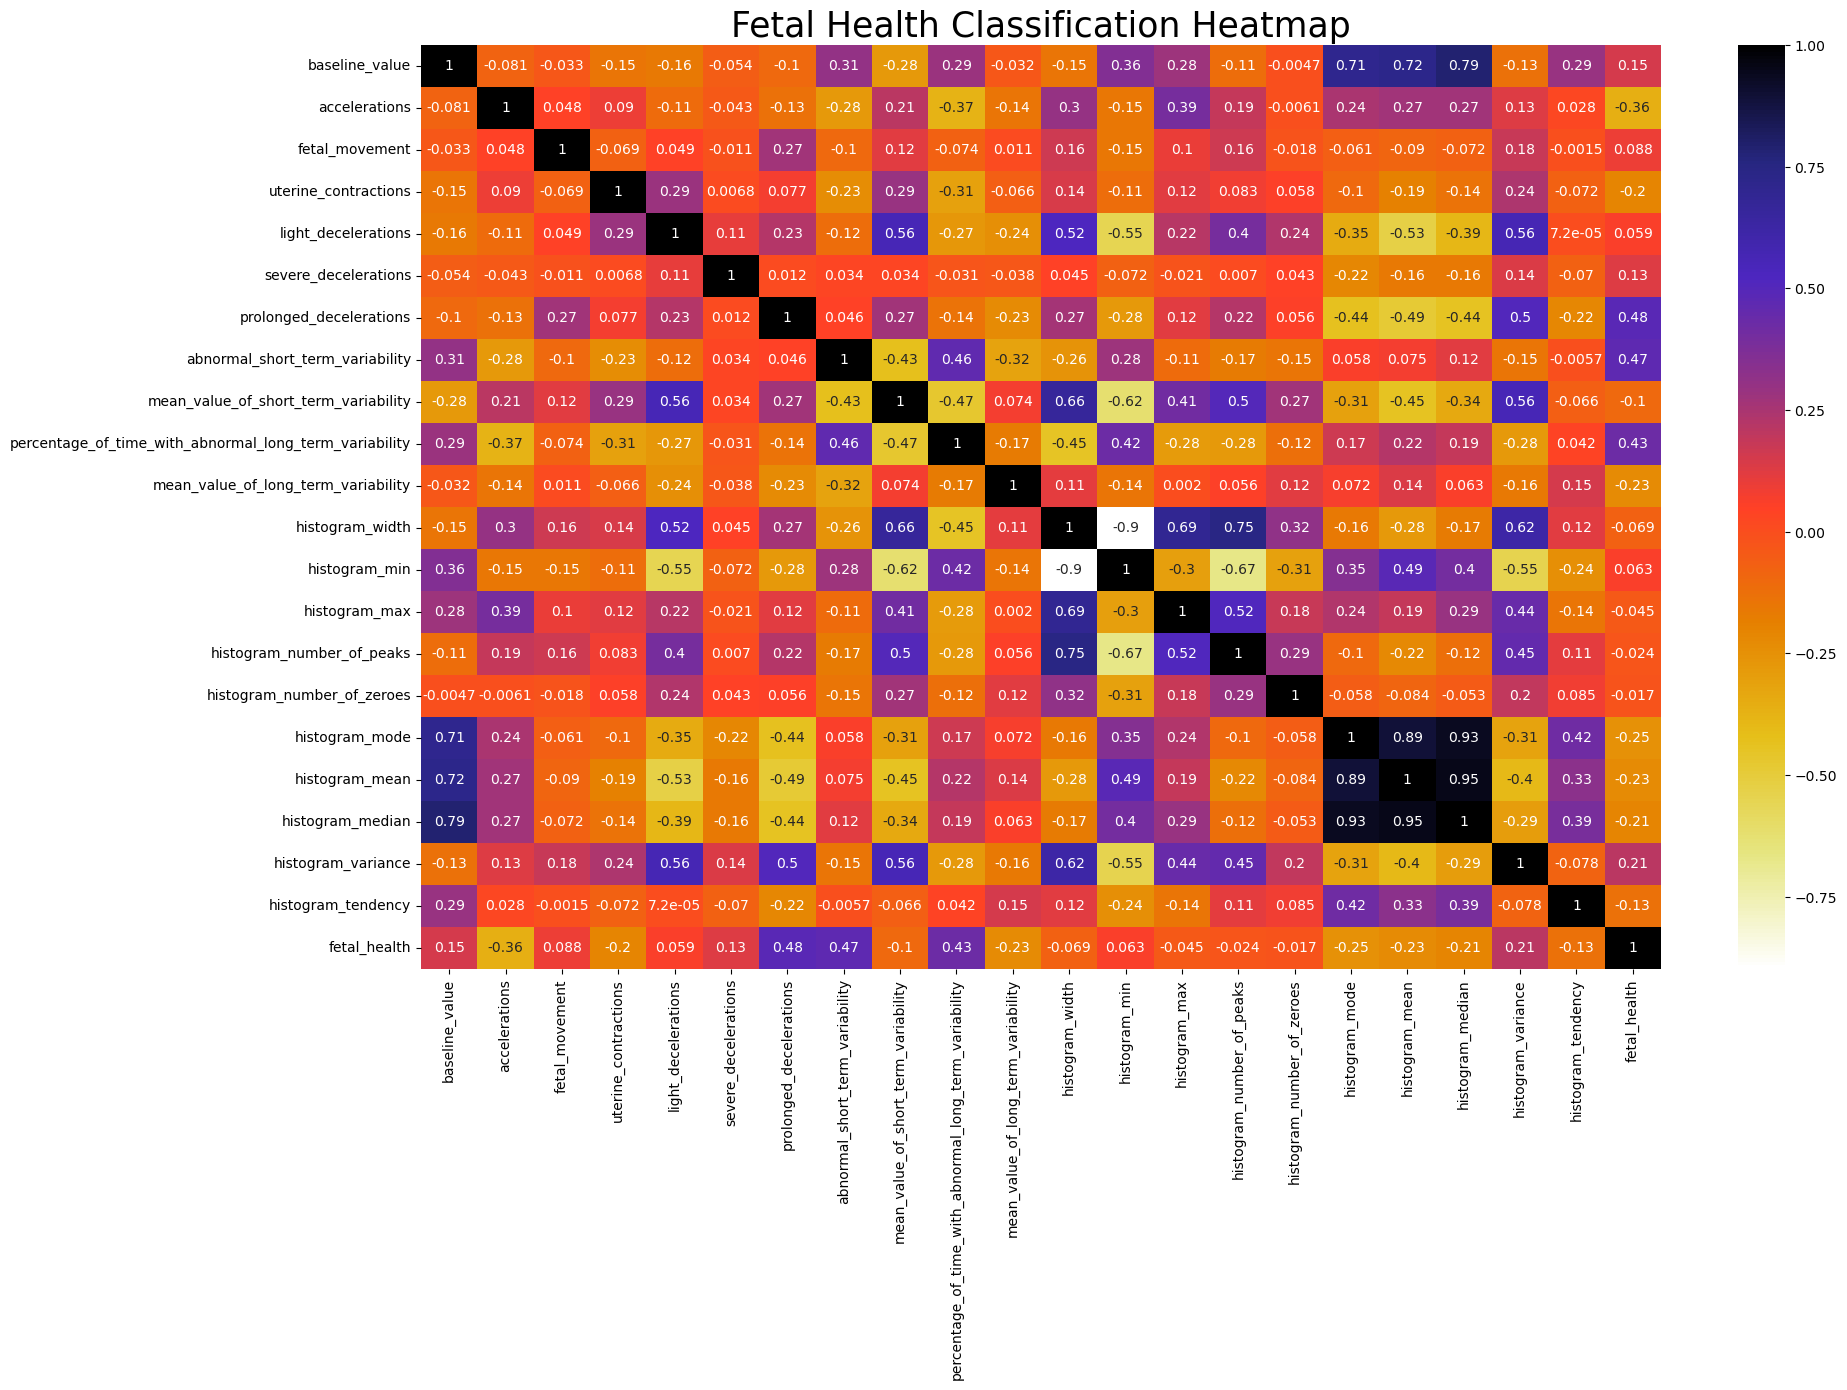

In [35]:
cor = fhealth.corr()
plt.figure(figsize=(20,12))
plt.title('Fetal Health Classification Heatmap', fontsize=25)
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

# Preprocessing

In [36]:
fhealth.info() #there is an object/categorical variable to transform

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolonged_decelerations                                 2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Cleaning Categorical Data, Perform One-Hot Encoding

In [37]:
#One-hot encoding for Fetal Health Outcomes
fhealth = pd.concat([fhealth, pd.get_dummies(fhealth['fhealth_outcome'],
prefix= 'fhealth_outcome')], axis=1)

In [38]:
fhealth.dtypes

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [39]:
fhealth.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,fhealth_outcome,fhealth_outcome_At Risk,fhealth_outcome_Normal
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,0.0,120.0,137.0,121.0,73.0,1.0,2.0,At Risk,1,0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,1.0,Normal,0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,1.0,Normal,0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,1.0,Normal,0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,1.0,Normal,0,1


In [40]:
fhealth = fhealth.drop(columns='fhealth_outcome', axis=1) #drop categorical value

In [41]:
fhealth = fhealth.drop(columns='fhealth_outcome_Normal', axis=1) #drop categorical value

In [42]:
fhealth = fhealth.rename(columns={'fhealth_outcome_At Risk':'target'}) #rename the at risk fetal health outcome as the target variable

In [43]:
fhealth.target.value_counts()

0    1655
1     471
Name: target, dtype: int64

In [44]:
fhealth.apply(pd.to_numeric) #convert all variables to numeric
fhealth

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,target
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,1
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0,1
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0,1
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,1
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,1


In [45]:
fhealth.dtypes #check numeric conversion

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

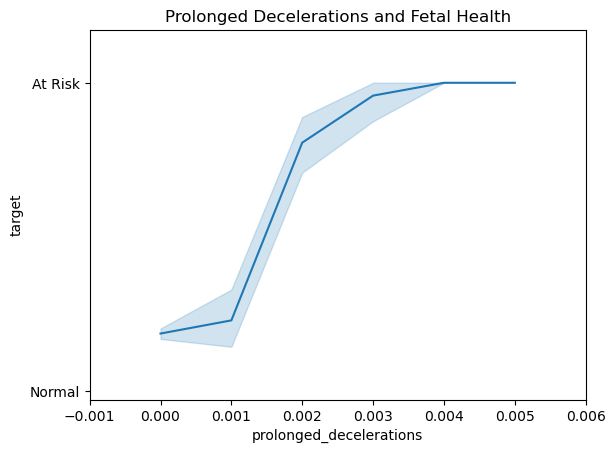

In [46]:
# fetal health and prolonged decelerations
sns.lineplot(x='prolonged_decelerations', y='target', data=fhealth, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

### Fetal Health worsens or becomes At-risk when the number of prolonged decelerations per second increases. This is a consistent trend with some pattern variability. Thus, prolonged decelerations is a good predictor of fetal health and will remain when defining X.

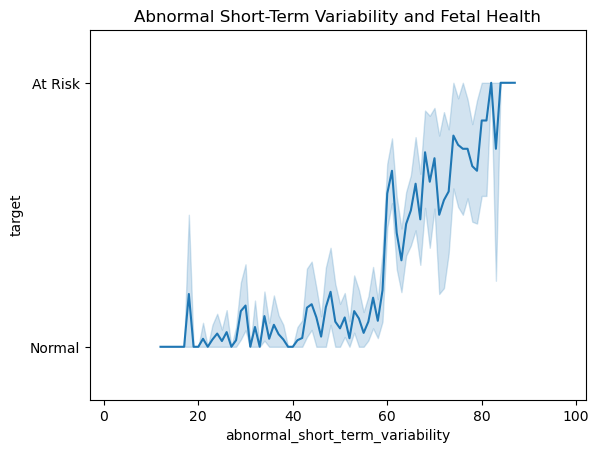

In [47]:
# fetal health and abnormal short term variability
sns.lineplot(x='abnormal_short_term_variability', y='target', data=fhealth, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Abnormal Short-Term Variability and Fetal Health')
plt.show()

### Fetal Health worsens or becomes At-risk when the percentage for abnormal short-term variability increases. This is a consistent trend with pattern variability. Thus, abnormal short-term variability is a moderate or good predictor of fetal health and will remain when defining X.

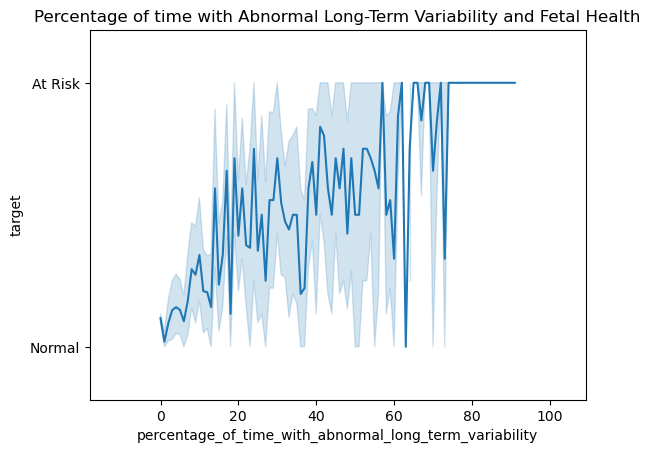

In [48]:
# fetal health and percentage of time with abnormal short term variability
sns.lineplot(x='percentage_of_time_with_abnormal_long_term_variability', y='target', data=fhealth, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Percentage of time with Abnormal Long-Term Variability and Fetal Health')
plt.show()

### Since there appears to be no consistent trend or pattern, percenatage of time with abnormal short-term variability on this data set is not a good predictor of fetal health and will be dropped when defining X.

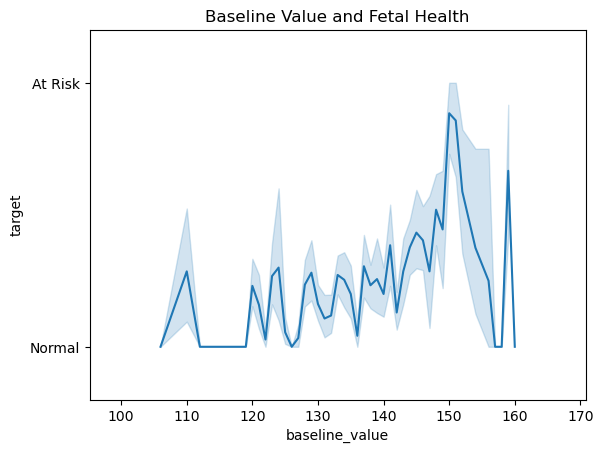

In [49]:
# fetal health and baseline value
sns.lineplot(x= 'baseline_value', y= 'target', data=fhealth, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Baseline Value and Fetal Health')
plt.show()

### Although a spike in baseline fetal heart rate around 150bpm marks at-risk fetal health, it is not trending much beyond that rate, since fetal health returns to normal before another spike to at-risk and back to normal again (probable outliers). Since there appears to be no trend or pattern, baseline value of fetal heart rate for this data set is not a good predictor of fetal health and will be dropped when defining X.

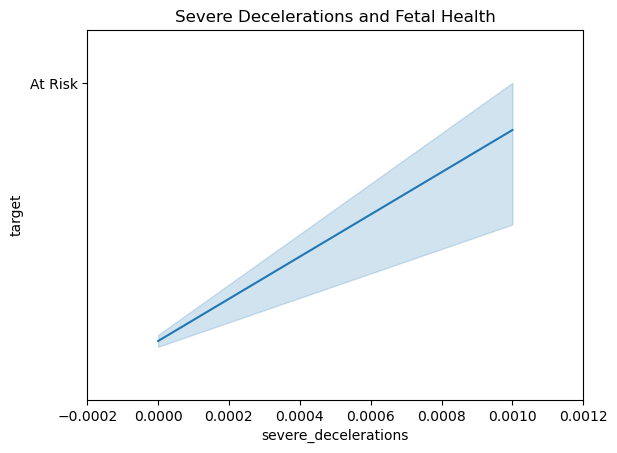

In [50]:
# fetal health and severe decelerations
sns.lineplot(x= 'severe_decelerations', y= 'target', data=fhealth, alpha=1.0)
y = [0,1]
ylabels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Severe Decelerations and Fetal Health')
plt.show()

### Fetal Health worsens or becomes At-risk when the number of severe decelerations per second increases. This is a consistent trend with no pattern variability. Thus, severe decelerations is a very good predictor of fetal health and will remain when defining X.

# Define X and y variables

In [51]:
## Dropping target variable, store features in X
X = fhealth.drop(['baseline_value', 'fetal_movement', 'histogram_tendency', 'histogram_variance', 'histogram_mean', 'histogram_median', 
                  'histogram_mode', 'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'histogram_max', 
                  'mean_value_of_short_term_variability', 'mean_value_of_long_term_variability', 'percentage_of_time_with_abnormal_long_term_variability','histogram_min', 
                  'histogram_width', 'light_decelerations', 'uterine_contractions', 'accelerations', 'fetal_health', 'target'], axis=1)

## Storing target variable in y
y = fhealth['target']

In [52]:
X

,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability
0,0.0,0.0,73.0
1,0.0,0.0,17.0
2,0.0,0.0,16.0
3,0.0,0.0,16.0
4,0.0,0.0,16.0
...,...,...,...
2121,0.0,0.0,79.0
2122,0.0,0.0,78.0
2123,0.0,0.0,79.0
2124,0.0,0.0,78.0


In [53]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2121    1
2122    1
2123    1
2124    1
2125    0
Name: target, Length: 2126, dtype: uint8

# Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

# Train-Test Split

In [55]:
###Split 80-20 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [56]:
X_train.shape

(1700, 3)

In [57]:
X_test.shape

(426, 3)

In [58]:
y_train.shape

(1700,)

In [59]:
y_test.shape

(426,)

# Decision Tree Model 1 Building

# At-Risk_or_Normal as Target Variable

In [60]:
# 1. Import the classifier you will use
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the class
dt=DecisionTreeClassifier(random_state=222)

# 3. Use the fit method of the instance
dt.fit(X_train, y_train)

# 4. Use the predict method to get the predictions
y_pred_dt_tree1 = dt.predict(X_train)

# 5. Look at the R^2 scores on train and test
print(dt.score(X_train, y_train))
# Try to attain a positive value, if R2 value is negative the residual sum of squares exceeds the total. 
# 87% of the data can be explained using decision trees

0.8723529411764706


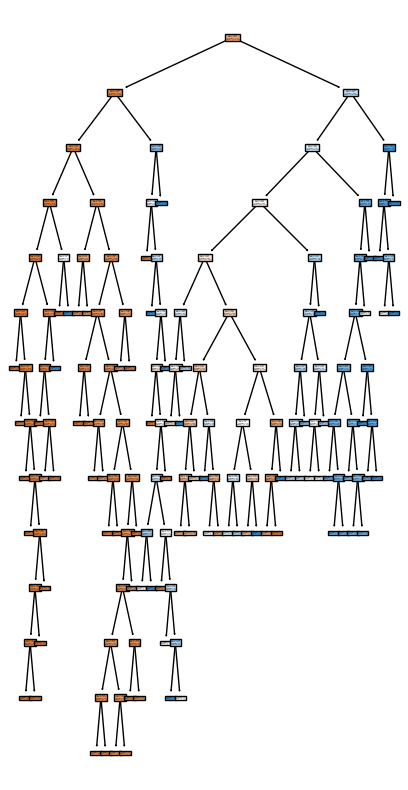

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))
plt.title('Fetal_Health')
plot_tree(dt,filled=True);

In [62]:
y_predict=dt.predict(X_test)
print(y_predict)

[0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [63]:
print(dt.predict_proba(X_test))

[[1.         0.        ]
 [0.2        0.8       ]
 [0.96       0.04      ]
 [0.96875    0.03125   ]
 [0.25       0.75      ]
 [0.95652174 0.04347826]
 [0.48484848 0.51515152]
 [0.4        0.6       ]
 [1.         0.        ]
 [0.94117647 0.05882353]
 [0.87878788 0.12121212]
 [0.48484848 0.51515152]
 [1.         0.        ]
 [0.92307692 0.07692308]
 [0.25       0.75      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.85294118 0.14705882]
 [0.48484848 0.51515152]
 [1.         0.        ]
 [0.8        0.2       ]
 [1.         0.        ]
 [0.8        0.2       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.88       0.12      ]
 [1.         0.        ]
 [0.37777778 0.62222222]
 [1.         0.        ]
 [1.         0.        ]
 [0.8125     0.1875    ]
 [1.         0.        ]
 [0.82758621 0.17241379]
 [0.92307692 0.07692308]
 [0.92307692 0.07692308]
 [0.2        0.8       ]
 [1.         0.        ]
 [0.96875    0.03125   ]


In [64]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
accuracy_dt = accuracy_score(y_true=y_train, y_pred=y_pred_dt_tree1)
accuracy_dt

0.8723529411764706

In [65]:
print(confusion_matrix(y_test,y_predict))

[[313  23]
 [ 37  53]]


In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       336
           1       0.70      0.59      0.64        90

    accuracy                           0.86       426
   macro avg       0.80      0.76      0.78       426
weighted avg       0.85      0.86      0.85       426



# Decision Tree Hyperparameter Tuning

In [67]:
grid_param = { 'criterion': ['gini', 'entropy'],
'max_depth' : range(2,40,1),
'min_samples_leaf' : range(1,20,1),
'min_samples_split': range(2,30,1),
'splitter' : ['best', 'random']
}

In [68]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=dt,param_grid=grid_param,cv=10,n_jobs =-1)

In [69]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=222),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 30),
                         'splitter': ['best', 'random']})

In [70]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 16, 'min_samples_split': 2, 'splitter': 'best'}


In [71]:
grid_search.best_score_

0.8611764705882352

 # New Decision Tree Model Build

In [72]:
dt2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf= 16, min_samples_split= 2, splitter ='best')
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=16)

In [73]:
dt2.score(X_test,y_test)

0.863849765258216

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_predict))

[[313  23]
 [ 37  53]]


In [75]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       336
           1       0.70      0.59      0.64        90

    accuracy                           0.86       426
   macro avg       0.80      0.76      0.78       426
weighted avg       0.85      0.86      0.85       426



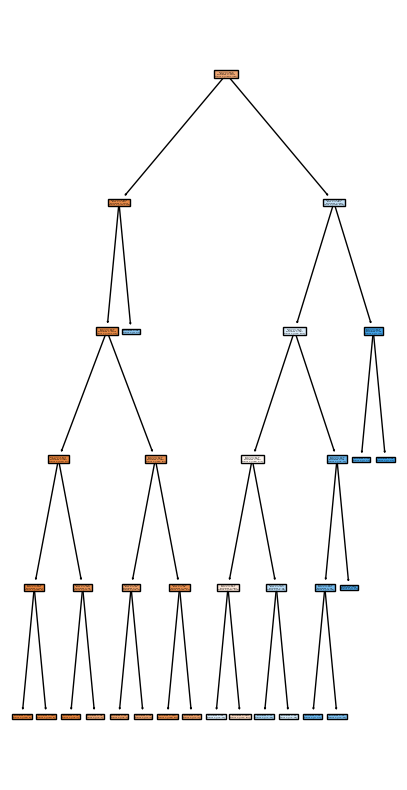

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))
plt.title('Fetal_Health')
plot_tree(dt2,filled=True);

# Random Forest Classifier

In [77]:
#Create RF Classifier
from sklearn.ensemble import RandomForestClassifier

#Fit the model to the training data
rf = RandomForestClassifier(n_estimators=99,
     max_features=5,
     max_depth=4,
     min_samples_split=100,
     random_state=85)

#Generate predictions on the training data
rf.fit(X_train, y_train)

#Use the predict method to get the predictions
y_pred_rf_tree1 = rf.predict(X_test)


# Look at the R^2 scores on train and test
print(rf.score(X_train, y_train))
# Try to attain a positive value, if R2 value is negative the residual sum of squares exceeds the total sum of squares. 
# 85.9% of the data can be explaing by Random Forest

0.8594117647058823


In [78]:
y_predict=rf.predict(X_test)
print(y_predict)

[0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [79]:
print(rf.predict_proba(X_test))

[[0.98728308 0.01271692]
 [0.20345835 0.79654165]
 [0.96201242 0.03798758]
 [0.89866544 0.10133456]
 [0.20184452 0.79815548]
 [0.89481698 0.10518302]
 [0.56612943 0.43387057]
 [0.56332922 0.43667078]
 [0.99070416 0.00929584]
 [0.89798307 0.10201693]
 [0.89741485 0.10258515]
 [0.56612943 0.43387057]
 [0.99070416 0.00929584]
 [0.98803144 0.01196856]
 [0.19823468 0.80176532]
 [0.98728308 0.01271692]
 [0.98803144 0.01196856]
 [0.29610034 0.70389966]
 [0.85587793 0.14412207]
 [0.89741485 0.10258515]
 [0.56612943 0.43387057]
 [0.99070416 0.00929584]
 [0.85587793 0.14412207]
 [0.98728308 0.01271692]
 [0.85587793 0.14412207]
 [0.99070416 0.00929584]
 [0.99070416 0.00929584]
 [0.89691201 0.10308799]
 [0.98728308 0.01271692]
 [0.47244338 0.52755662]
 [0.98728308 0.01271692]
 [0.90070759 0.09929241]
 [0.86174626 0.13825374]
 [0.99070416 0.00929584]
 [0.89757503 0.10242497]
 [0.98803144 0.01196856]
 [0.98803144 0.01196856]
 [0.20345835 0.79654165]
 [0.99070416 0.00929584]
 [0.89866544 0.10133456]


In [80]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_predict))

[[310  26]
 [ 30  60]]


In [81]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       336
           1       0.70      0.67      0.68        90

    accuracy                           0.87       426
   macro avg       0.80      0.79      0.80       426
weighted avg       0.87      0.87      0.87       426



# FINAL OBSERVATIONS
- R^2 scores are higher for decision trees.
- However, The Random Forest Classifier was the overall best performing model, with 87% accuracy outperforming decision trees by 1%.
- After hyperameter tuning for decision trees,  having the same performance no improvement was noted for accuracy, precision, recall, and f1-score metrics. Random Classifier is the best performing model without need for tuning.